## ML Lab AI22

The purpose of this lab is to use the tools you have learned in machine learning to gain knowledge and apply them to various types of problems that you may encounter in the industry. Note that the algorithms and models we build here will be simple, and it is not uncommon in the industry to combine multiple models in solutions. The point of this lab is to gain an understanding of how to approach different types of problems using machine learning.

## Parts

1. Recommender system
2. Disease prediction

## Recommender system
When you watch Youtube, order food online, buy books online, listen to Spotify, use LinkedIn, you constantly receive recommendations for new videos, dishes, etc. What is behind these recommendations is a type of <a href="https://en.wikipedia.org/wiki/Recommender_system">recommender system</a>.

## 1.0 Warm up
Börja med att kolla på <a href="https://www.youtube.com/watch?v=4Ws0oPH350U">denna youtube-video</a> och följ efter i kod för att skapa ett enkelt recommender system för filmer med hjälp av KNN. Datasetet som används i videon är från movielens small som består av 100,000 ratings på 9000 filmer och 600 användare.


## 1.1 Movielens full - EDA
Nu ska du ladda ned datasetet <a href="https://grouplens.org/datasets/movielens/">ml-latest.zip</a> under sektionen "recommended for education and development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna nedan.

a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan, utan försök undersöka fler aspekter av datan.

b) Vilka är de 10 filmerna med flest ratings?

c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

d) Gör en plot över årtal och antalet filmer representerade i datasetet. 

e) Gör en plot över antalet ratings mot movieId.

f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.

In [1]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

movies='../Data/ml-latest/movies.csv'
ratings='../Data/ml-latest/ratings.csv'

df_movies=pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [2]:
df_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,58098.0,111919.516197,59862.660956,1.0,72437.75,126549.0,161449.5,193886.0


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB


In [4]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
df_ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [6]:
top_10 = df_ratings['movieId'].value_counts().head(10)
top_10

318     97999
356     97040
296     92406
593     87899
2571    84545
260     81815
480     76451
527     71516
110     68803
1       68469
Name: movieId, dtype: int64

## Most rated movies

In [28]:
def most_rated(n, include_index=False):
    top = df_ratings['movieId'].value_counts().head(n).index
    for i in top:
        title = df_movies[df_movies['movieId'] == i]
        print(title['title'].to_string(index=include_index))
        print(f"Total ratings: {df_ratings['movieId'].value_counts().head(n).loc[i]} \n")

most_rated(5, include_index=True)

315    Shawshank Redemption, The (1994)
Total ratings: 97999 

352    Forrest Gump (1994)
Total ratings: 97040 

293    Pulp Fiction (1994)
Total ratings: 92406 

587    Silence of the Lambs, The (1991)
Total ratings: 87899 

2487    Matrix, The (1999)
Total ratings: 84545 



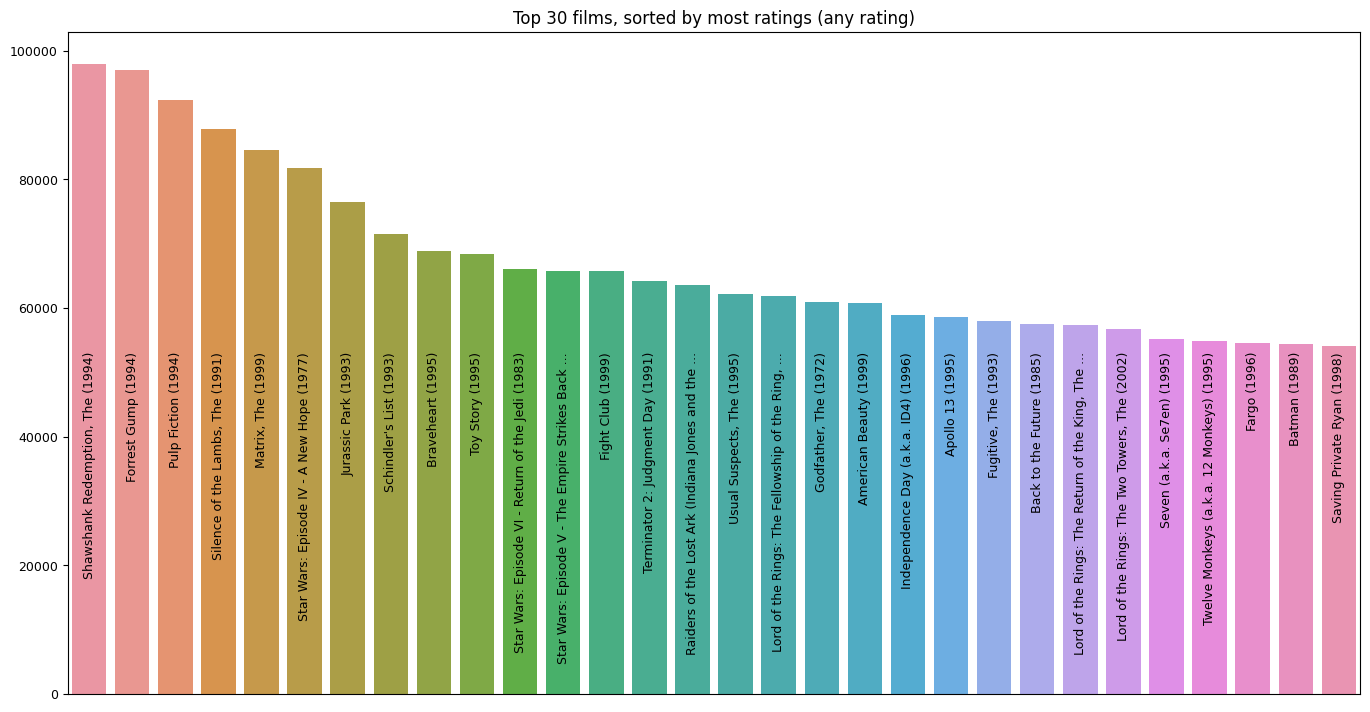

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

def plot_most_ratings(n):
    top = df_ratings['movieId'].value_counts().head(n).index

    title_name = []
    for i in top:
        title = df_movies[df_movies['movieId'] == i]
        title_name.append(title['title'].to_string(index=False))

    #plt.bar(x=title_name, height=df_ratings['movieId'].value_counts().head(10))

    rcParams['figure.figsize'] = 14,7
    sns.barplot(x=title_name, y=df_ratings['movieId'].value_counts().head(n))

    # Testing stuff TODO: how to adjust starting position for text labels on bars ??? now they line up at the end of the last character, should line up at first
    plt.tick_params(labelsize = 9)
    plt.tick_params(length = -250, axis='x')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.title(f'Top {n} films, sorted by most ratings (any rating)')
    plt.ylabel('')

    plt.show()

plot_most_ratings(30)

<div style="display: flex; flex-direction: row; padding: 40px; margin: 20px;">
  <div style="flex: 1;">

<h2>df_ratings.info()</h2>

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB
```

  </div>

  <div style="flex: 1;">

<h2>df_movies.info()</h2>

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB
````

  </div>

</div>

Memory usage is relatively high for ratings (300 MB), given that it's almost 28 million entries, we could (or should?) reduce this in multiple ways.
Also, strings need formatting, issues with 'The,' ?? Is it only 'The' causing issues - gotta check that out later

ohhh never mind just realized why that *issue* isn't an issue, but a *feature*, because searching for titles you don't search with 'The' for many movies.. i think?? anyway

## Average rating for most rated movies

In [138]:
def average_rating(i, include_title=False):
    muvee = df_ratings.loc[df_ratings['movieId'] == i]
    if include_title:
        print(df_movies[df_movies['movieId'] == i].to_string(index=False))
    return muvee['rating'].mean()

In [73]:
# same function but updated with average rating

def most_rated(n, include_index=False):
    top = df_ratings['movieId'].value_counts().head(n).index
    for i in top:
        title = df_movies[df_movies['movieId'] == i]
        print(title['title'].to_string(index=include_index))
        print(f"Total ratings: {df_ratings['movieId'].value_counts().head(n).loc[i]}")
        print(f'Rating average: {average_rating(i):.2f} \n')

most_rated(10, include_index=True)

315    Shawshank Redemption, The (1994)
Total ratings: 97999
Rating average: 4.42 

352    Forrest Gump (1994)
Total ratings: 97040
Rating average: 4.06 

293    Pulp Fiction (1994)
Total ratings: 92406
Rating average: 4.17 

587    Silence of the Lambs, The (1991)
Total ratings: 87899
Rating average: 4.15 

2487    Matrix, The (1999)
Total ratings: 84545
Rating average: 4.15 

257    Star Wars: Episode IV - A New Hope (1977)
Total ratings: 81815
Rating average: 4.12 

476    Jurassic Park (1993)
Total ratings: 76451
Rating average: 3.67 

523    Schindler's List (1993)
Total ratings: 71516
Rating average: 4.26 

108    Braveheart (1995)
Total ratings: 68803
Rating average: 4.01 

0    Toy Story (1995)
Total ratings: 68469
Rating average: 3.89 



In [50]:
df_movies['title'][315]

'Shawshank Redemption, The (1994)'

In [65]:
muvee = df_ratings.loc[df_ratings['movieId'] == 315]

muvee['rating'].mean()

2.899848

In [64]:
muvee

,userId,movieId,rating
108,4,315,2.0
871,6,315,1.0
1535,18,315,3.0
1665,19,315,4.0
7698,81,315,3.0
...,...,...,...
27742712,283107,315,2.0
27744924,283128,315,4.0
27747082,283155,315,3.0
27750124,283195,315,3.5


## 1.2 Skapa gles matris

Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId" och values: "ratings". Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset, pröva dig fram och motivera.
Skapa en gles (sparse) matris av denna pivottabell ```scipy.sparse.csc_matrix()```

## 1.3 Recommender system    

Skapa ett recommender system med KNN och låt systemet ta input från användaren och skriva ut top 5 rekommenderade filmerna, baserat på användarens sökquery. Observera att det finns ett logiskt fel i videon som gör att rekommendationerna inte blir så bra, försök hitta felet och åtgärda det.

a) Beskriv med ord hur dit system funkar

b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte källhänvisa